In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [8]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

  
# Set DataFrame as the Stock Ticker
roku = DataReader("ROKU", 'yahoo', start, end)

In [9]:
roku

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-03,129.479996,123.199997,123.900002,127.500000,10112900,127.500000
2020-02-04,132.789993,128.770004,129.100006,131.029999,7994400,131.029999
2020-02-05,133.509995,125.019997,133.460007,125.940002,8797400,125.940002
2020-02-06,129.020004,124.233002,126.400002,126.160004,6425800,126.160004
2020-02-07,127.600998,123.900002,126.300003,124.250000,5447800,124.250000
...,...,...,...,...,...,...
2021-01-26,429.390015,400.309998,424.980011,403.399994,4229800,403.399994
2021-01-27,420.000000,383.600006,394.950012,402.260010,5698400,402.260010
2021-01-28,409.114014,392.183990,409.100006,404.010010,3558800,404.010010


In [10]:
roku.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,189.305782,179.101877,183.789072,184.308909,9.444654e+06,184.308909
std,93.995381,90.275301,91.955924,92.310143,6.772724e+06,92.310143
min,74.849998,58.220001,60.299999,63.840000,1.846100e+06,63.840000
25%,123.039999,114.922499,118.777502,118.614998,5.057950e+06,118.614998
50%,155.150002,147.487999,150.915001,150.355003,7.871650e+06,150.355003
75%,228.827496,219.097504,223.630005,223.867496,1.195600e+07,223.867496
max,448.170013,425.605011,442.820007,434.140015,6.356780e+07,434.140015


In [11]:
roku.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-02-03 to 2021-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Text(0.5, 0, '')

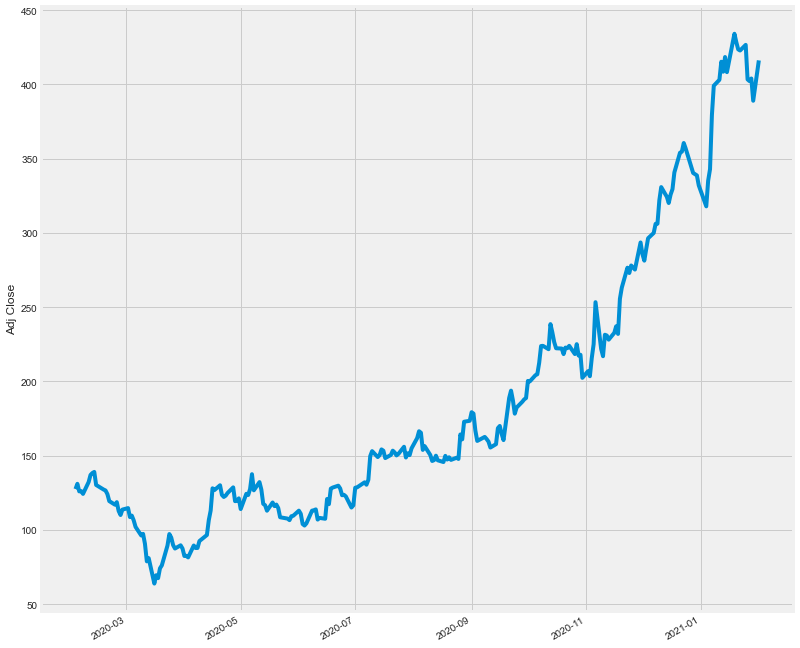

In [12]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

roku['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
# plt.title(f"{tech_list[i - 1]}")

Text(0.5, 0, '')

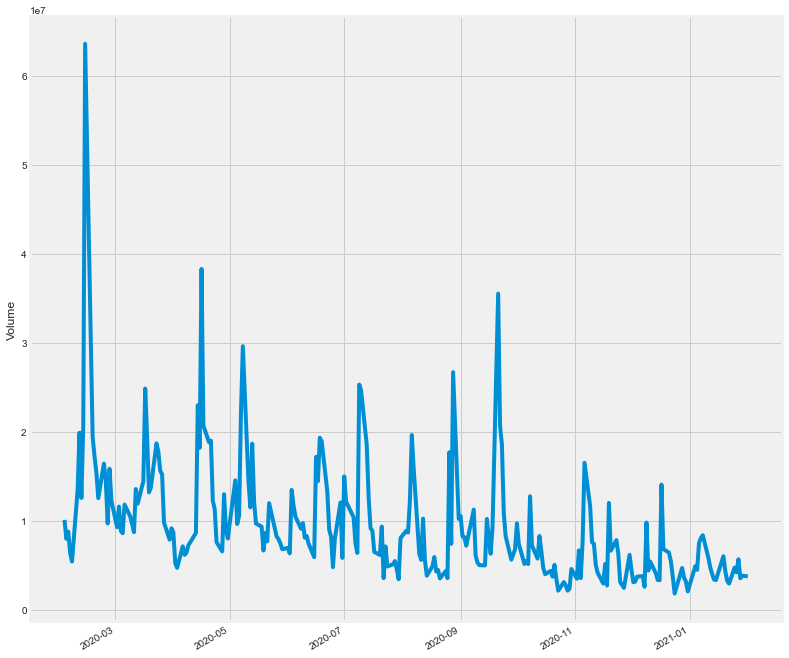

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

roku['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)

In [15]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    roku[column_name] = roku['Adj Close'].rolling(ma).mean()

In [16]:
roku.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')

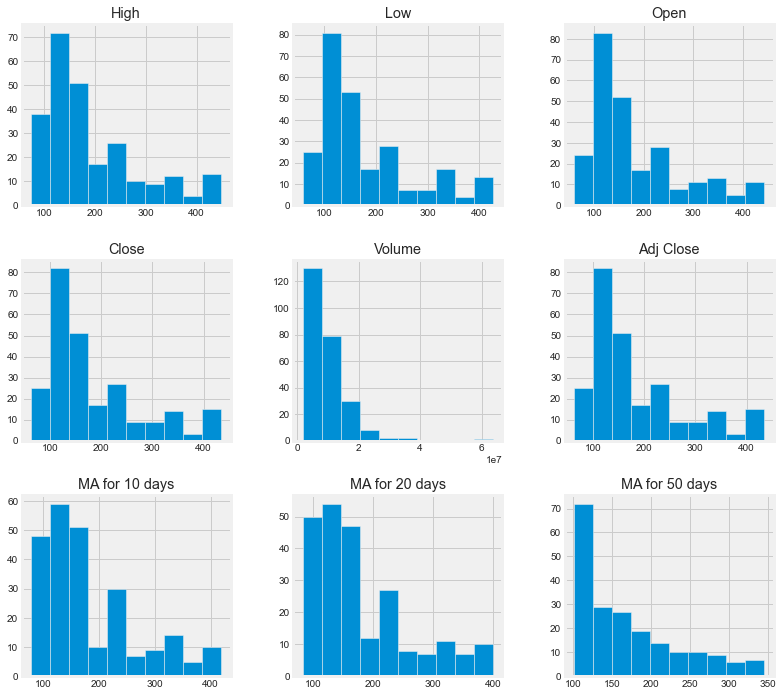

In [18]:
roku.hist(figsize=(12, 12));

<AxesSubplot:xlabel='Date'>

<Figure size 1728x864 with 0 Axes>

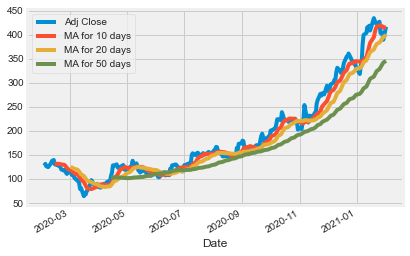

In [32]:
plt.figure(figsize=(24, 12))
roku[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
# plt.set_title('Roku')

<AxesSubplot:xlabel='Date'>

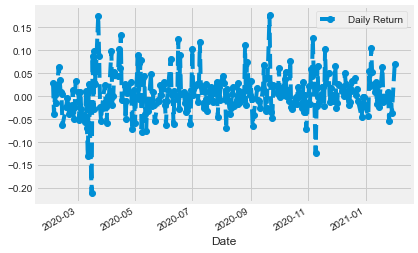

In [35]:
roku['Daily Return'] = roku['Adj Close'].pct_change()
roku['Daily Return'].plot( legend=True, linestyle='--', marker='o')

<AxesSubplot:>

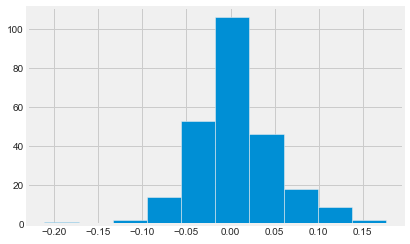

In [36]:
roku['Daily Return'].hist()

<AxesSubplot:>

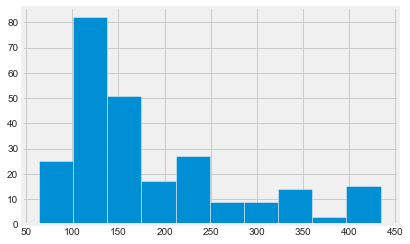

In [38]:
roku['Adj Close'].hist()

## INVESTPY

In [1]:
pip install investpy

  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Created wheel for investpy: filename=investpy-1.0.1-py3-none-any.whl size=4473065 sha256=d3b591a27918dc89d2e8785077158475db57d163a3b98089b34a429fbd7eaace
  Stored in directory: c:\users\adhar\appdata\local\pip\cache\wheels\8d\23\0c\8da590460e6a0b10334bae4a23bca003ef2aa4bad12bc4d9b3
Successfully built investpy
Note: you may need to restart the kernel to use updated packages.


In [1]:
import investpy as ip

df = ip.get_stock_recent_data(stock='AAPL', country='united states')
print(df.head())

              Open    High     Low   Close     Volume Currency
Date                                                          
2021-01-04  133.45  133.60  126.80  129.41  143301888      USD
2021-01-05  129.00  131.71  128.53  131.01   97664896      USD
2021-01-06  127.52  131.03  126.47  126.60  155087968      USD
2021-01-07  128.41  131.62  127.88  130.92  109578160      USD
2021-01-08  132.43  132.63  130.23  132.05  105158000      USD


In [2]:
dfaapl_h = ip.get_stock_historical_data(stock='AAPL', country='united states', 
                                        from_date='01/01/2019', to_date='01/01/2021',)
print(dfaapl_h.head())

             Open   High    Low  Close     Volume Currency
Date                                                      
2019-01-02  38.72  39.71  38.56  39.48  148158944      USD
2019-01-03  35.99  36.43  35.50  35.55  365248768      USD
2019-01-04  36.13  37.14  35.95  37.06  234428288      USD
2019-01-07  37.17  37.21  36.48  36.98  219111056      USD
2019-01-08  37.39  37.95  37.13  37.69  164101248      USD


In [3]:
dfaapl_h

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-01-02,38.72,39.71,38.56,39.48,148158944,USD
2019-01-03,35.99,36.43,35.50,35.55,365248768,USD
2019-01-04,36.13,37.14,35.95,37.06,234428288,USD
2019-01-07,37.17,37.21,36.48,36.98,219111056,USD
2019-01-08,37.39,37.95,37.13,37.69,164101248,USD
...,...,...,...,...,...,...
2020-12-24,131.32,133.46,131.10,131.97,54930000,USD
2020-12-28,133.99,137.34,133.52,136.69,124486240,USD
2020-12-29,138.05,138.78,134.36,134.87,121047328,USD
